# Universidad de las Américas
**Materia:** Inteligencia Artificial I  
**Estudiante:** Gorky Palacios Mutis

## Actividad: Aplicación práctica

### Descripción
Desarrollo de un programa en Python para aplicar Regresión Logística.

### Información adicional
- Buscar un set de datos en otras fuentes de libre acceso: Kaggle, INEC, GitHub, etc.
- El archivo que se obtenga de la fuente de datos debería al menos tener 100 registros.
- El archivo que se obtenga de la fuente de datos debería tener la posibilidad de aplicar el Algoritmo de Regresión Logística.

### Justificación del dataset
Se eligió el dataset "Students Social Media Addiction" porque contiene información relevante sobre el uso de redes sociales por parte de estudiantes, incluyendo variables numéricas y categóricas, así como una puntuación de adicción. Esto permite crear una variable binaria (adicto/no adicto) y aplicar el algoritmo de Regresión Logística para predecir la adicción en función de variables como la edad y las horas promedio de uso diario. El dataset cumple con el requisito de tener más de 100 registros y es de libre acceso.

### Descripción de las celdas de código
1. **Importación de bibliotecas:** Se importan las librerías necesarias para el análisis y modelado.
2. **Carga y preparación del dataset:** Se carga el archivo CSV, se crea la columna binaria `Is_Addicted` y se visualizan las primeras filas.
3. **Selección de variables:** Se seleccionan las variables numéricas relevantes para el modelo (edad y horas promedio de uso diario).
4. **División de datos:** Se divide el dataset en conjuntos de entrenamiento y prueba, mostrando ejemplos de cada uno.
5. **Escalado de características:** Se normalizan las variables numéricas para mejorar el desempeño del modelo.
6. **Entrenamiento del modelo:** Se entrena el modelo de regresión logística con los datos de entrenamiento.
7. **Predicción:** Se realizan predicciones sobre el conjunto de prueba y se comparan con los valores reales.
8. **Evaluación:** Se calcula y muestra la matriz de confusión y la precisión del modelo.
9. **Visualización (entrenamiento):** Se grafica la frontera de decisión del modelo sobre los datos de entrenamiento.
10. **Visualización (prueba):** Se grafica la frontera de decisión del modelo sobre los datos de prueba.
11. **Análisis de resultados:** Se interpreta la matriz de confusión, la precisión y los gráficos obtenidos, explicando el desempeño del modelo y posibles mejoras.

# Regresión Logística: Adicción a Redes Sociales en Estudiantes

Este notebook implementa un modelo de regresión logística para predecir si un estudiante es adicto a las redes sociales en base a su puntuación de adicción y otras variables relevantes del dataset.

In [1]:
# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [2]:
# Cargar el dataset
students = pd.read_csv('Students Social Media Addiction.csv')

# Crear la columna Is_Addicted: 1 si Addicted_Score > 7, 0 en caso contrario
students['Is_Addicted'] = (students['Addicted_Score'] > 7).astype(int)

# Mostrar las primeras filas para verificar
students[['Addicted_Score', 'Is_Addicted']].head()

,Addicted_Score,Is_Addicted
0,8,1
1,3,0
2,9,1
3,4,0
4,7,0


## Selección de variables para el modelo

Se utilizarán las variables numéricas más relevantes: Edad y Horas promedio de uso diario.

In [3]:
# Selección de variables numéricas relevantes
X = students[['Age', 'Avg_Daily_Usage_Hours']].values
y = students['Is_Addicted'].values

print("Primeras filas de X:")
print(X[:5])
print("Primeras etiquetas de y:")
print(y[:5])

Primeras filas de X:
[[19.   5.2]
 [22.   2.1]
 [20.   6. ]
 [18.   3. ]
 [21.   4.5]]
Primeras etiquetas de y:
[1 0 1 0 0]


In [4]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Primeras filas de X_train:")
print(X_train[:5])
print("Primeras etiquetas de y_train:")
print(y_train[:5])
print("Primeras filas de X_test:")
print(X_test[:5])
print("Primeras etiquetas de y_test:")
print(y_test[:5])

Primeras filas de X_train:
[[22.   3.3]
 [21.   4.4]
 [21.   4.6]
 [22.   4.7]
 [22.   5. ]]
Primeras etiquetas de y_train:
[0 0 0 0 0]
Primeras filas de X_test:
[[22.   4.4]
 [19.   4. ]
 [19.   3.3]
 [20.   4.9]
 [23.   6.8]]
Primeras etiquetas de y_test:
[0 0 0 0 1]


In [5]:
# Escalado de características
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Primeras filas de X_train escalado:")
print(X_train[:5])
print("Primeras filas de X_test escalado:")
print(X_test[:5])

Primeras filas de X_train escalado:
[[ 1.00179646 -1.34500071]
 [ 0.27918918 -0.44853937]
 [ 0.27918918 -0.2855464 ]
 [ 1.00179646 -0.20404991]
 [ 1.00179646  0.04043954]]
Primeras filas de X_test escalado:
[[ 1.00179646 -0.44853937]
 [-1.16602539 -0.77452531]
 [-1.16602539 -1.34500071]
 [-0.44341811 -0.04105694]
 [ 1.72440375  1.50737628]]


In [6]:
# Entrenamiento del modelo de regresión logística
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
# Predicción sobre el conjunto de prueba
y_pred = classifier.predict(X_test)
print("Predicciones vs Realidad:")
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

Predicciones vs Realidad:
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 

In [8]:
# Matriz de confusión y precisión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:")
print(accuracy)

Matriz de Confusión:
[[123  11]
 [  9  34]]
Precisión del modelo:
0.8870056497175142


C:\Users\Gorky\AppData\Local\Temp\ipykernel_9768\345407116.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


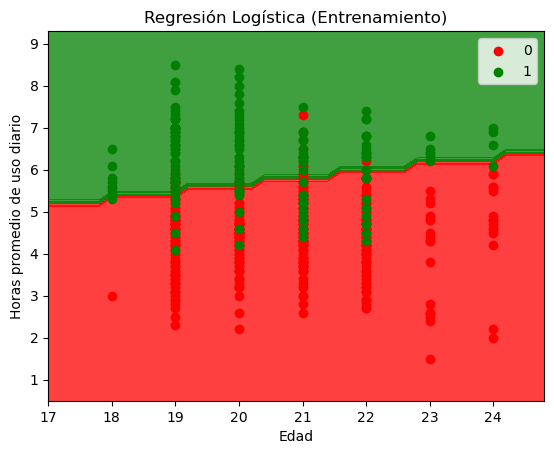

In [9]:
# Visualización de la frontera de decisión (conjunto de entrenamiento)
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.2),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.2))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Regresión Logística (Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Horas promedio de uso diario')
plt.legend()
plt.show()

C:\Users\Gorky\AppData\Local\Temp\ipykernel_9768\2885509096.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


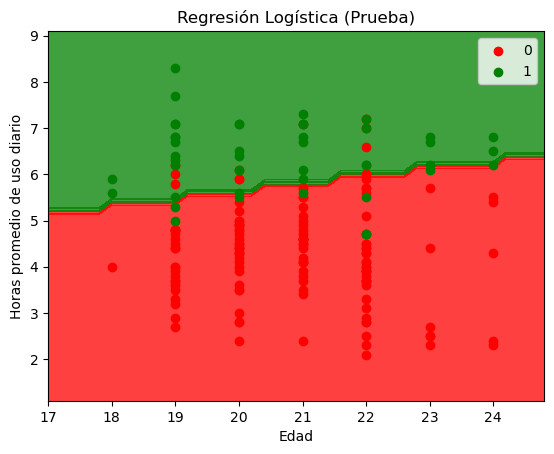

In [10]:
# Visualización de la frontera de decisión (conjunto de prueba)
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.2),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.2))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Regresión Logística (Prueba)')
plt.xlabel('Edad')
plt.ylabel('Horas promedio de uso diario')
plt.legend()
plt.show()

# Análisis de Resultados

A continuación se analizan los resultados obtenidos por el modelo de regresión logística aplicado a la predicción de adicción a redes sociales en estudiantes:

**Matriz de Confusión y Precisión Obtenidas:**

|               | Predicho No Adicto | Predicho Adicto |
|---------------|--------------------|-----------------|
| Real No Adicto|      123           |      11         |
| Real Adicto   |      9             |      34         |

- **123** estudiantes no adictos fueron correctamente clasificados (verdaderos negativos).
- **34** estudiantes adictos fueron correctamente clasificados (verdaderos positivos).
- **11** estudiantes no adictos fueron clasificados erróneamente como adictos (falsos positivos).
- **9** estudiantes adictos fueron clasificados erróneamente como no adictos (falsos negativos).

La precisión (accuracy) calculada es **0.887** (88.7%), lo que indica que el modelo acierta en el 88.7% de los casos.

**Interpretación de los Gráficos:**
- Los gráficos muestran la frontera de decisión del modelo. El fondo verde indica la región donde el modelo predice "adicto" y el fondo rojo donde predice "no adicto".
- Los puntos representan estudiantes: si la mayoría de los puntos verdes (adictos) están en la región verde y los rojos (no adictos) en la roja, el modelo separa bien las clases.
- Los puntos que aparecen en la región opuesta a su clase real representan errores de clasificación, que también se reflejan en la matriz de confusión.

**Conclusión:**
- El modelo logra una precisión alta usando solo edad y horas promedio de uso diario, aunque algunos estudiantes adictos/no adictos pueden ser clasificados incorrectamente.
- Para mejorar el desempeño, se podrían incluir más variables relevantes del dataset.
- La matriz de confusión y la precisión permiten cuantificar el desempeño, mientras que los gráficos ayudan a visualizar cómo el modelo toma sus decisiones.